In [1]:
### Import the libraries ### 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil import parser

In [3]:
df = pd.read_csv('appdata10.csv')

In [4]:
# EDA #

In [5]:
df.head(5)

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [6]:
df.tail(5)

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
49995,222774,2013-05-09 13:46:17.871,3,13:00:00,32,"Splash,Home,ScanPreview,VerifyPhone,VerifySSN,...",13,0,0,1,2013-05-09 13:47:52.875,0
49996,169179,2013-04-09 00:05:17.823,1,00:00:00,35,"Cycle,Splash,Home,RewardsContainer",4,0,1,0,NaN,0
49997,302367,2013-02-20 22:41:51.165,2,22:00:00,39,"joinscreen,product_review,product_review2,Scan...",25,0,0,0,NaN,0
49998,324905,2013-04-28 12:33:04.288,6,12:00:00,27,"Cycle,Home,product_review,product_review,produ...",26,0,0,1,2013-04-28 12:35:38.709,0
49999,27047,2012-12-14 01:22:44.638,4,01:00:00,25,"product_review,ScanPreview,VerifyDateOfBirth,V...",26,0,0,0,NaN,1


In [7]:
df.describe()

,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   user                  50000 non-null  int64 
 1   first_open            50000 non-null  object
 2   dayofweek             50000 non-null  int64 
 3   hour                  50000 non-null  object
 4   age                   50000 non-null  int64 
 5   screen_list           50000 non-null  object
 6   numscreens            50000 non-null  int64 
 7   minigame              50000 non-null  int64 
 8   used_premium_feature  50000 non-null  int64 
 9   enrolled              50000 non-null  int64 
 10  enrolled_date         31074 non-null  object
 11  liked                 50000 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 4.6+ MB


In [9]:
df.isnull().sum()

user                        0
first_open                  0
dayofweek                   0
hour                        0
age                         0
screen_list                 0
numscreens                  0
minigame                    0
used_premium_feature        0
enrolled                    0
enrolled_date           18926
liked                       0
dtype: int64

In [10]:
#Enrolled date has 18926 missing values

Values in the hour column is in string format - We will convert it into int

In [11]:
df['hour'] = df['hour'].str.slice(1,3).astype(int)

In [12]:
df['hour']

0         2
1         1
2        19
3        16
4        18
         ..
49995    13
49996     0
49997    22
49998    12
49999     1
Name: hour, Length: 50000, dtype: int32

In [13]:
#Let us look at the distribution of some of the key variables
key_cols = ['dayofweek', 'hour', 'age', 'numscreens', 'used_premium_feature', 'liked']
df_plot = df[key_cols]

In [14]:
df_plot

,dayofweek,hour,age,numscreens,used_premium_feature,liked
0,3,2,23,15,0,0
1,6,1,24,13,0,0
2,1,19,23,3,1,1
3,4,16,28,40,0,0
4,1,18,31,32,0,1
...,...,...,...,...,...,...
49995,3,13,32,13,0,0
49996,1,0,35,4,1,0
49997,2,22,39,25,0,0
49998,6,12,27,26,0,0


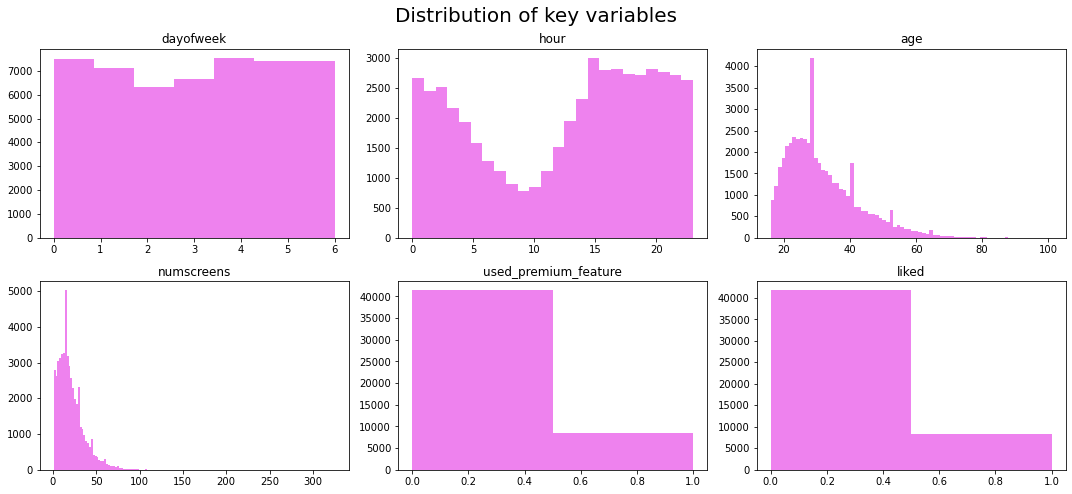

In [15]:
plt.figure(figsize=(15,10))
plt.suptitle("Distribution of key variables", fontsize = 20)
for i in range(1, df_plot.shape[1]+1):
    plt.subplot(3,3,i)
    f=plt.gca()
    f.set_title(df_plot.columns[i-1])
    vals = np.size(df_plot.iloc[:,i-1].unique())
    plt.hist(df_plot.iloc[:,i-1], bins = vals, color = 'violet')
plt.tight_layout()    

<AxesSubplot:title={'center':'Correlation with Response Variable'}>

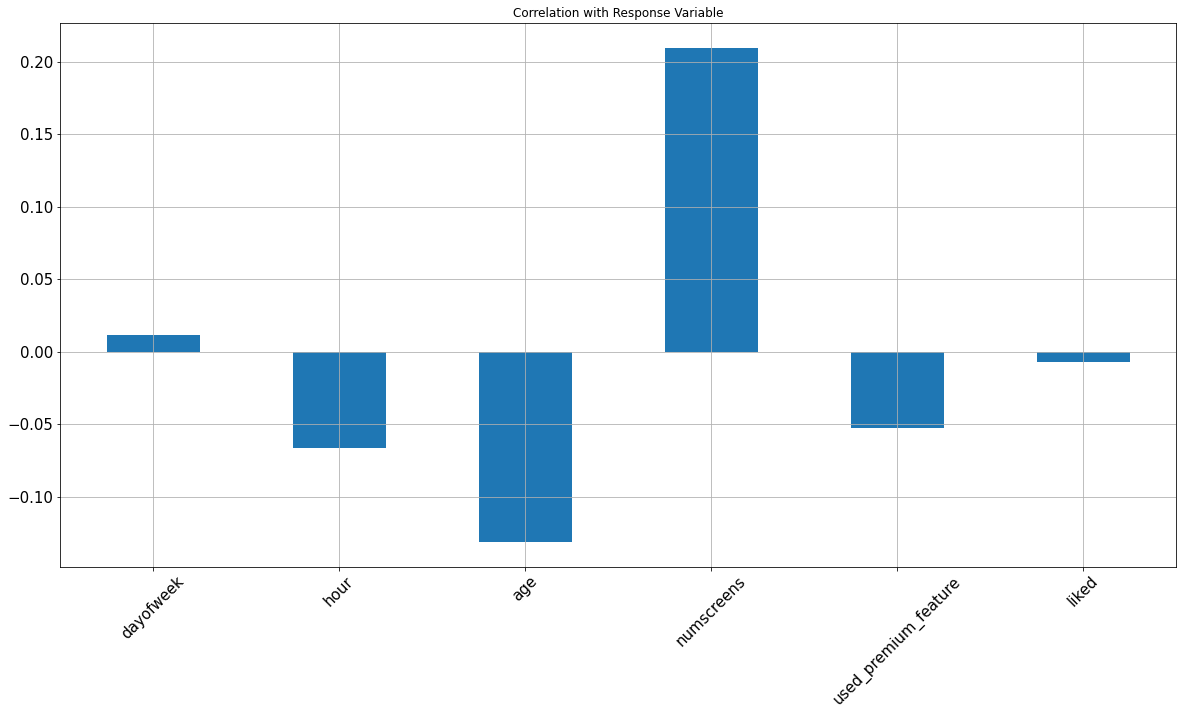

In [16]:
# Correlations with response #
df_plot.corrwith(df.enrolled).plot.bar(figsize = (20,10), title = 'Correlation with Response Variable', fontsize = 15, rot = 45,
                                      grid = True)

In [17]:
#Correlation Matrix
sns.set(style ='white', font_scale = 2)
corr = df_plot.corr()

<AxesSubplot:>

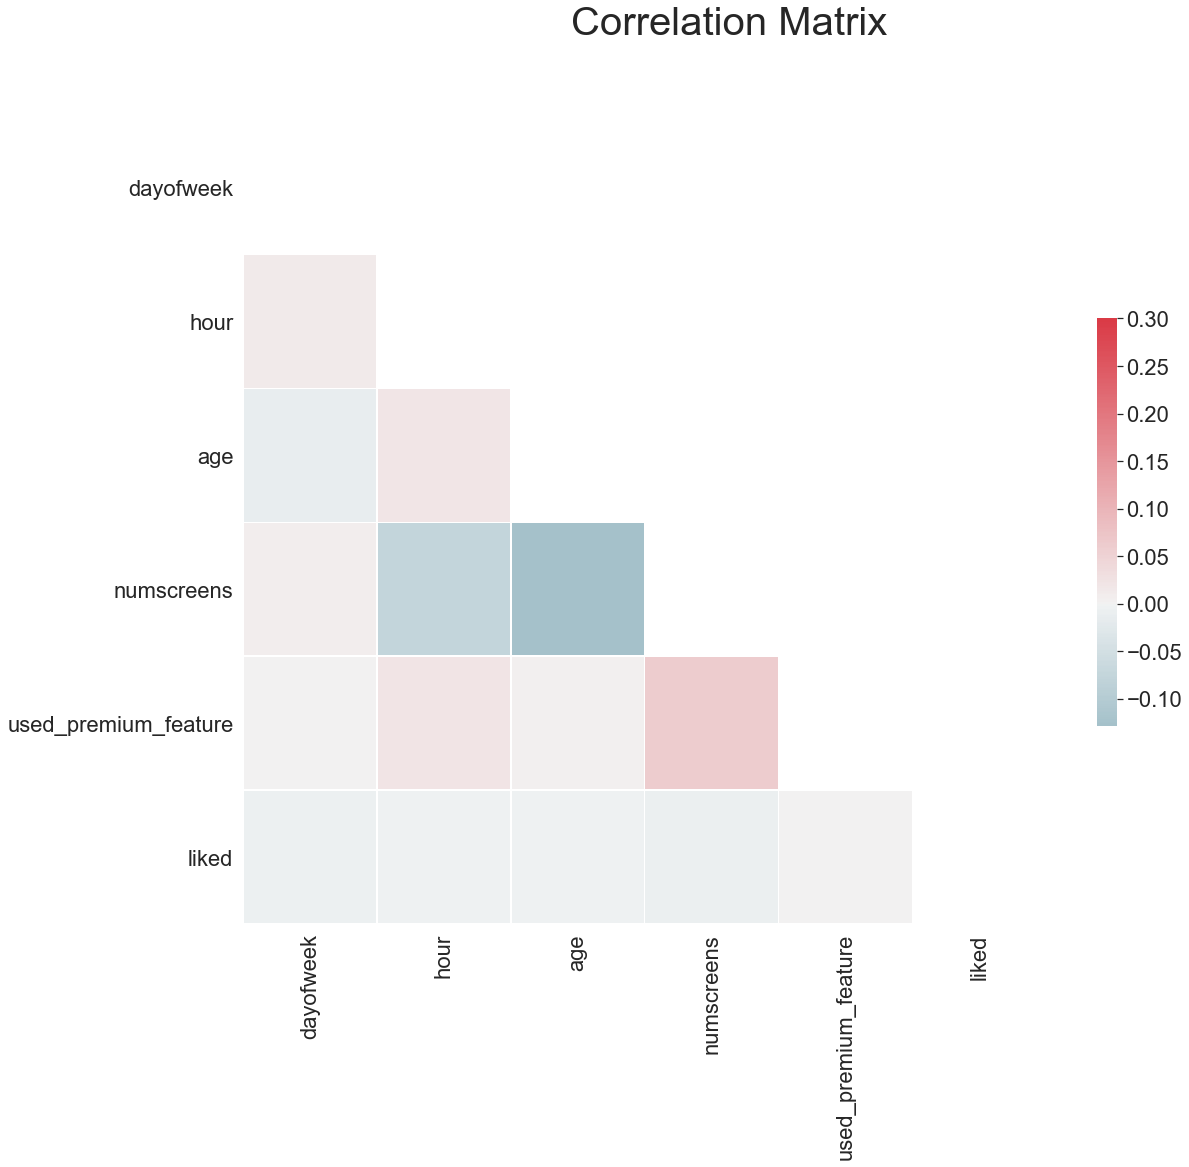

In [18]:
#Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype = bool)
mask[np.triu_indices_from(mask)] = True
#Setting up the matplotlib figure
f,ax = plt.subplots(figsize =(18,15))
f.suptitle("Correlation Matrix", fontsize = 40)
#Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap = True)
#Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask = mask, cmap = cmap, vmax = 0.3, center = 0, square = True, linewidths=0.5, cbar_kws={"shrink": .5})

## FEATURE ENGINEERING 

In [19]:
df.dtypes

user                     int64
first_open              object
dayofweek                int64
hour                     int32
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object

In [20]:
#Example use of the parser function
parser.parse(df['first_open'][0])

datetime.datetime(2012, 12, 27, 2, 14, 51, 273000)

In [21]:
df['first_open'] = df['first_open'].apply(lambda x: parser.parse(x))

In [22]:
df['enrolled_date'] = [parser.parse(row_data) if isinstance(row_data, str) else row_data for row_data in df['enrolled_date']]

In [23]:
df.dtypes

user                             int64
first_open              datetime64[ns]
dayofweek                        int64
hour                             int32
age                              int64
screen_list                     object
numscreens                       int64
minigame                         int64
used_premium_feature             int64
enrolled                         int64
enrolled_date           datetime64[ns]
liked                            int64
dtype: object

In [24]:
df['difference'] = (df['enrolled_date']-df['first_open']).astype('timedelta64[h]')

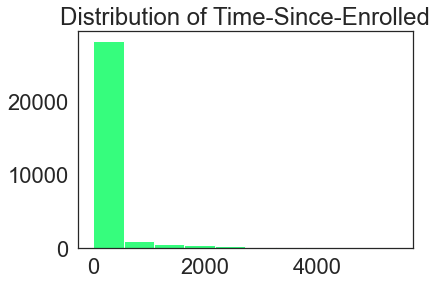

In [25]:
plt.hist(df['difference'].dropna(), color = '#36FD7D')
plt.title('Distribution of Time-Since-Enrolled')
plt.show()

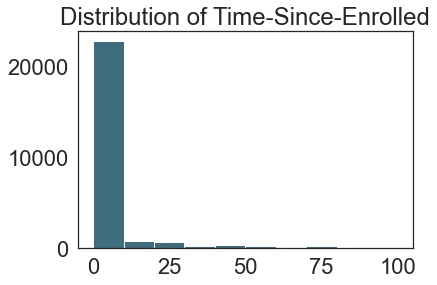

In [26]:
plt.hist(df['difference'].dropna(), color = '#3F6D7D', range=[0,100])
plt.title('Distribution of Time-Since-Enrolled')
plt.show()

In [27]:
df.loc[df.difference > 48, 'enrolled'] = 0
df = df.drop(columns = ['difference', 'enrolled_date', 'first_open'])

In [28]:
df

,user,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,liked
0,235136,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,0
1,333588,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,0
2,254414,1,19,23,"Splash,Cycle,Loan",3,0,1,0,1
3,234192,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,0
4,51549,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...
49995,222774,3,13,32,"Splash,Home,ScanPreview,VerifyPhone,VerifySSN,...",13,0,0,1,0
49996,169179,1,0,35,"Cycle,Splash,Home,RewardsContainer",4,0,1,0,0
49997,302367,2,22,39,"joinscreen,product_review,product_review2,Scan...",25,0,0,0,0
49998,324905,6,12,27,"Cycle,Home,product_review,product_review,produ...",26,0,0,1,0


In [29]:
#Formatting the screen list field
top_screens = pd.read_csv('top_screens.csv').top_screens.values
top_screens
# Mapping Screens to Fields
df['screen_list'] = df.screen_list.astype(str) + ','

In [33]:

for sc in top_screens:
    df[sc] = df.screen_list.str.contains(sc).astype(int)
    df['screen_list'] = df.screen_list.str.replace(sc+",", "")
df['Other'] = df.screen_list.str.count(",")
df = df.drop(columns=['screen_list'])


## Funnels 

In [34]:
df.columns

Index(['user', 'dayofweek', 'hour', 'age', 'numscreens', 'minigame',
       'used_premium_feature', 'enrolled', 'liked', 'Loan2', 'location',
       'Institutions', 'Credit3Container', 'VerifyPhone', 'BankVerification',
       'VerifyDateOfBirth', 'ProfilePage', 'VerifyCountry', 'Cycle',
       'idscreen', 'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash',
       'Loan', 'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts', 'Saving8',
       'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile', 'VerifyHousing',
       'RewardDetail', 'VerifyHousingAmount', 'ProfileMaritalStatus',
       'ProfileChildren ', 'ProfileEducation', 'Saving7',
       'ProfileEducationMajor', 'Rewards', 'AccountView', 'VerifyAnnualIncome',
       'VerifyIncomeType', 'Saving2', 'Saving6', 'Saving2Amount', 'Saving5',
       'ProfileJobTitle', 'Login', 'ProfileEmploymentLength', 'WebView',
       'SecurityModal', 'Loan4', 'ResendTok

#### Some of the variables are strongly correlated to each other and we have information about these variables. So the goal is to combine these correlated variables into a single column or 'FUNNEL' 

In [36]:
#For example these columns prefixed by the word Saving are correlated and can be combined
savings_screens = ["Saving1",
                    "Saving2",
                    "Saving2Amount",
                    "Saving4",
                    "Saving5",
                    "Saving6",
                    "Saving7",
                    "Saving8",
                    "Saving9",
                    "Saving10"]

In [37]:
df["SavingCount"] = df[savings_screens].sum(axis=1)
df = df.drop(columns=savings_screens)

In [38]:
cm_screens = ["Credit1",
               "Credit2",
               "Credit3",
               "Credit3Container",
               "Credit3Dashboard"]
df["CMCount"] = df[cm_screens].sum(axis=1)
df = df.drop(columns=cm_screens)

cc_screens = ["CC1",
                "CC1Category",
                "CC3"]
df["CCCount"] = df[cc_screens].sum(axis=1)
df = df.drop(columns=cc_screens)

loan_screens = ["Loan",
               "Loan2",
               "Loan3",
               "Loan4"]
df["LoansCount"] = df[loan_screens].sum(axis=1)
df = df.drop(columns=loan_screens)


In [40]:
#### Saving Results ####
df.head()
df.describe()
df.columns

df.to_csv('new_appdata10.csv', index = False)


## MODEL BUILDING 

#### DATA PREPROCESSING

In [41]:
import time

In [45]:
df_new = pd.read_csv('new_appdata10.csv')

In [46]:
# Splitting Independent and Response Variables
X = df_new.drop(columns = ['enrolled']) #Independent Data
y = df_new['enrolled'] #Response variable

In [47]:
X

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked,location,Institutions,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,Other,SavingCount,CMCount,CCCount,LoansCount
0,235136,3,2,23,15,0,0,0,0,0,...,0,0,0,0,0,7,0,0,0,0
1,333588,6,1,24,13,0,0,0,0,0,...,0,0,0,0,0,5,0,0,0,0
2,254414,1,19,23,3,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,234192,4,16,28,40,0,0,0,0,0,...,0,0,0,0,0,6,0,0,0,0
4,51549,1,18,31,32,0,0,1,0,0,...,0,0,0,0,0,10,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,222774,3,13,32,13,0,0,0,0,0,...,0,0,0,0,0,6,0,0,0,0
49996,169179,1,0,35,4,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
49997,302367,2,22,39,25,0,0,0,0,0,...,0,0,0,0,0,6,0,0,0,0
49998,324905,6,12,27,26,0,0,0,0,0,...,0,0,0,0,0,13,0,0,0,0


In [48]:
y

0        0
1        0
2        0
3        1
4        1
        ..
49995    1
49996    0
49997    0
49998    1
49999    0
Name: enrolled, Length: 50000, dtype: int64

In [58]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [54]:
X_train

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked,location,Institutions,VerifyPhone,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,Other,SavingCount,CMCount,CCCount,LoansCount
20330,2,20,32,5,0,1,1,0,0,0,...,0,0,0,0,0,2,0,0,0,1
17532,1,21,22,42,1,0,0,0,0,0,...,0,0,0,0,0,13,0,0,0,0
45819,0,4,26,85,1,0,0,0,0,0,...,0,0,0,0,0,10,0,0,0,1
34807,4,13,25,24,1,0,0,0,0,0,...,0,0,0,0,0,10,0,0,0,0
31888,3,16,50,11,0,0,0,0,0,0,...,0,0,0,0,0,3,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21243,5,23,19,6,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
45891,0,15,22,4,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
42613,3,6,25,43,0,0,0,0,0,0,...,0,0,0,0,0,4,0,0,0,0
43567,4,13,27,4,1,0,1,0,0,0,...,0,0,0,0,0,2,0,0,0,0


In [59]:
# Removing Identifiers
training_id = X_train['user']
X_train = X_train.drop(columns = ['user'])
testing_id = X_test['user']
X_test = X_test.drop(columns = ['user'])

In [61]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_new = pd.DataFrame(scaler.fit_transform(X_train))
X_test_new = pd.DataFrame(scaler.fit_transform(X_test))
X_train_new.columns = X_train.columns.values
X_test_new.columns = X_test.columns.values
X_train_new.index = X_train.index.values
X_test_new.index = X_test.index.values

In [63]:
#### Model Building ####


# Fitting Model to the Training Set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, penalty = 'l1', solver='liblinear')
classifier.fit(X_train_new, y_train)


LogisticRegression(penalty='l1', random_state=0, solver='liblinear')

In [65]:
# Predicting Test Set
y_pred = classifier.predict(X_test_new)

# Evaluating Results
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, classification_report
cm = confusion_matrix(y_test, y_pred)
accuracy_score(y_test, y_pred)
precision_score(y_test, y_pred) # tp / (tp + fp)
recall_score(y_test, y_pred) # tp / (tp + fn)
f1_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.68      0.69      5072
           1       0.68      0.70      0.69      4928

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.69     10000
weighted avg       0.69      0.69      0.69     10000



Test Data Accuracy: 0.6905


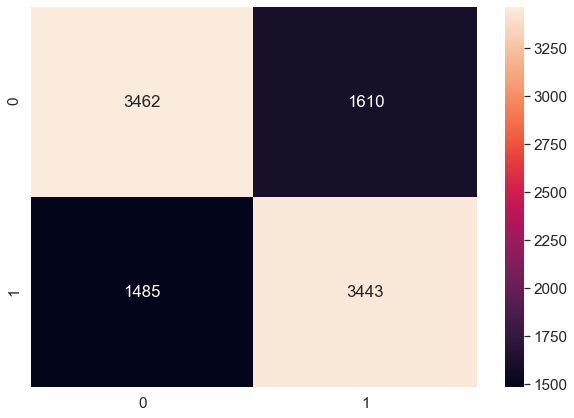

In [68]:
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

In [69]:

# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("SVM Accuracy: %0.3f (+/- %0.3f)" % (accuracies.mean(), accuracies.std() * 2))

# Analyzing Coefficients
pd.concat([pd.DataFrame(df.drop(columns = 'user').columns, columns = ["features"]),
           pd.DataFrame(np.transpose(classifier.coef_), columns = ["coef"])
           ],axis = 1)

SVM Accuracy: 0.693 (+/- 0.007)


,features,coef
0,dayofweek,0.033508
1,hour,-0.034211
2,age,-0.167319
3,numscreens,0.146661
4,minigame,0.001545
5,used_premium_feature,-0.085674
6,enrolled,0.004915
7,liked,0.000000
8,location,0.000000
9,Institutions,0.000000


In [70]:
#### Model Tuning ####

## Grid Search (Round 1)
from sklearn.model_selection import GridSearchCV

# Select Regularization Method
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

# Combine Parameters
parameters = dict(C=C, penalty=penalty)

grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = "accuracy",
                           cv = 10,
                           n_jobs = -1)
t0 = time.time()
grid_search = grid_search.fit(X_train, y_train)
t1 = time.time()
print("Took %0.2f seconds" % (t1 - t0))

rf_best_accuracy = grid_search.best_score_
rf_best_parameters = grid_search.best_params_
rf_best_accuracy, rf_best_parameters

Took 10.06 seconds


(0.693025, {'C': 10, 'penalty': 'l1'})

In [71]:


## Grid Search (Round 2)

# Select Regularization Method
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = [0.1, 0.5, 0.9, 1, 2, 5]

# Combine Parameters
parameters = dict(C=C, penalty=penalty)

grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = "accuracy",
                           cv = 10,
                           n_jobs = -1)
t0 = time.time()
grid_search = grid_search.fit(X_train, y_train)
t1 = time.time()
print("Took %0.2f seconds" % (t1 - t0))

rf_best_accuracy = grid_search.best_score_
rf_best_parameters = grid_search.best_params_
rf_best_accuracy, rf_best_parameters
grid_search.best_score_


Took 7.03 seconds


0.6930000000000001

In [76]:
#### End of Model ####


# Formatting Final Results
final_results = pd.concat([y_test, testing_id], axis = 1).dropna()
final_results['predicted_results'] = y_pred
final_results = final_results[['user', 'enrolled', 'predicted_results']].reset_index(drop=True)


In [77]:
final_results

,user,enrolled,predicted_results
0,239786,1,1
1,279644,1,1
2,98290,0,0
3,170150,1,1
4,237568,1,0
...,...,...,...
9995,143036,1,1
9996,91158,1,1
9997,248318,0,0
9998,142418,1,1
